### Regression

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn.metrics import r2_score

In [98]:
data = pd.read_csv('electricity_plant.csv')
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Выбираем целевой столбец и делим выборку на тренировочную и тестовую

In [99]:
X, y = data.drop('PE', axis=1), data['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True)

### Linear Regression

Построим Linear Regression и посмотрим коэффициенты, с которыми данные входят в модель

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.coef_

array([-1.99248512, -0.22833106,  0.06306527, -0.15773241])

По коэффицициентам видно, как значение из каждого столбца влияет на то, насколько уменьшится или увеличится целевое значение,   а именно:

$Y = -1.99248512 \cdot X_{1} -0.22833106 \cdot X_{2} + 0.06306527 \cdot X_{3} -0.15773241 \cdot X_{4}$ , <br> где $X_{1}$ - AT , $X_{2}$ - V , $X_{3}$ - RH  , $X_{4}$ - AP

Нормализуем данные и построим Linear Regression для них

In [101]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
linear_regression_coefs = pipe.steps[1][1].coef_
linear_regression_coefs

array([-14.8796515 ,  -2.89972971,   0.37537176,  -2.30246358])

По полученным коэффициентам посмотрим: <br>
1. Направление - уменьшится или увеличится целевое значение (зависит от знака перед коэффициентом):
 - AT(Temperature), V(Exhaust Vacuum), RH(Relative Humidity) - целевое значение уменьшится с увеличением этих значений
 - AP(Ambient Pressure) - целевое значение увеличится с увеличением этих значений
2. Значимость - насколько каждое значение влияет на целевое (зависит от модулей значений коэффициентов)
 - AT - наиболее сильное влияние на значение
 - V, RH 
 - AP - самое незначительное влияение

Посчитаем r2-score для Linear Regression

In [102]:
linear_regression_r2_score = r2_score(y_test, y_pred)
print('Linear regression')
print(f'R2: {r2_score(y_test, y_pred)}')

Linear regression
R2: 0.9253965563534897


R2_score достаточно близок к 1, это значит, что Linear Regression достаточно хорошая модель для данного набора данных

График разницы реальных и предсказанных значений для Linear Regression

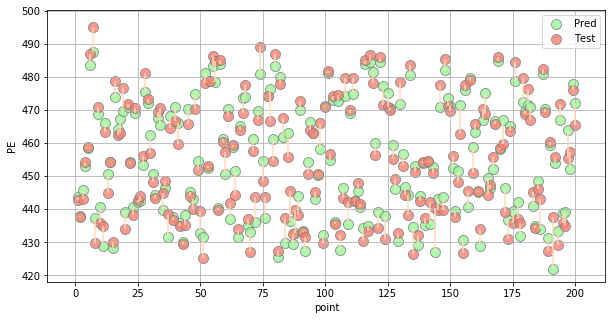

In [103]:
x = [i for i in range(len(y_pred))] 
size_ = 201
fig, axes = plt.subplots(figsize=(10, 5))
plt.scatter(x[1:size_], y_pred[1:size_], c='palegreen', edgecolors = 'gray', s = 100, label='Pred', alpha = 0.8)
plt.scatter(x[1:size_], list(y_test)[1:size_], c='salmon', edgecolors = 'gray', s = 100, label='Test', alpha = 0.8)
for i in range(1,size_):
    axes.vlines(x[i], min(y_pred[i], list(y_test)[i]), max(y_pred[i], list(y_test)[i]), color = 'peachpuff')
plt.xlabel('point')
plt.ylabel('PE')
plt.legend()
plt.grid()
plt.show()

Из графика видно, что, в целом, разница между реальными значениями и предсказанными не велика, т.е. использование Linear Regression приемлемо.

### Ridge Regression

Построим Ridge Regression и посмотрим коэффициенты, с которыми данные входят в эту модель

In [104]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
ridge.coef_

array([-1.9896413 , -0.2294035 ,  0.06378065, -0.15724657])

По коэффицициентам видно, как значение из каждого столбца влияет на то, насколько уменьшится или увеличится целевое значение :

$Y = -1.9896413 \cdot X_{1} -0.2294035 \cdot X_{2} + 0.06378065 \cdot X_{3} -0.15724657 \cdot X_{4}$ , <br> где  $X_{i}$ соответствуют тем же признакам, что и в Linear Regression

Нормализуем данные и построим Ridge Regression для них

In [105]:
pipe = make_pipeline(StandardScaler(), Ridge(alpha=100))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
ridge_regression_coefs = pipe.steps[1][1].coef_
ridge_regression_coefs

array([-13.87622448,  -3.48785866,   0.59456292,  -1.93188565])

По полученным коэффициентам посмотрим: <br>
1. Направление - уменьшится или увеличится целевое значение (зависит от знака перед коэффициентом):
 - AT(Temperature), V(Exhaust Vacuum), RH(Relative Humidity) - целевое значение уменьшится с увеличением этих значений
 - AP(Ambient Pressure) - целевое значение увеличится с увеличением этих значений
2. Значимость - насколько каждое значение влияет на целевое (зависит от модулей значений коэффициентов)
 - AT - наиболее сильное влияние на значение
 - V, RH
 - AP - самое незначительное влияение

Посчитаем r2-score для Ridge Regression

In [106]:
ridge_regression_r2_score = r2_score(y_test, y_pred)
print('Ridge')
print(f'R2: {r2_score(y_test, y_pred)}')

Ridge
R2: 0.9252938226390941


R2_score достаточно близок к 1, это значит, что Ridge Regression достаточно хорошая модель для данного набора данных

График разницы реальных и предсказанных значений для Ridge Regression

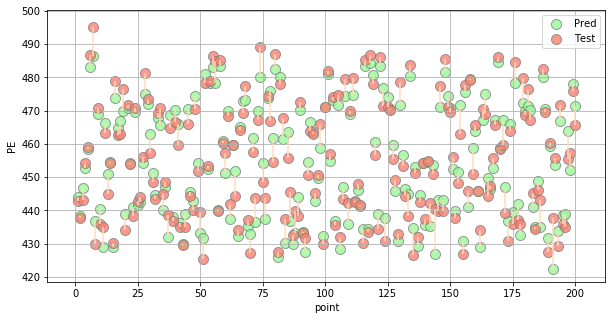

In [107]:
x = [i for i in range(len(y_pred))] 
size_ = 201
fig, axes = plt.subplots(figsize=(10, 5))
plt.scatter(x[1:size_], y_pred[1:size_], c='palegreen', edgecolors = 'gray', s = 100, label='Pred', alpha = 0.8)
plt.scatter(x[1:size_], list(y_test)[1:size_], c='salmon', edgecolors = 'gray', s = 100, label='Test', alpha = 0.8)
for i in range(1,size_):
    axes.vlines(x[i], min(y_pred[i], list(y_test)[i]), max(y_pred[i], list(y_test)[i]), color = 'peachpuff')
plt.xlabel('point')
plt.ylabel('PE')
plt.legend()
plt.grid()
plt.show()

Из графика видно, что, в целом, разница между реальными значениями и предсказанными не велика, т.е. использование Ridge Regression приемлемо.

#### Cравним коэффициенты и r2-score у Linear и Ridge regression

In [108]:
print(f'R2-score Linear regression: {linear_regression_r2_score}')
print(f'R2-score Ridge regression: {ridge_regression_r2_score}')
print(linear_regression_r2_score > ridge_regression_r2_score)

R2-score Linear regression: 0.9253965563534897
R2-score Ridge regression: 0.9252938226390941
True


И в Linear Regression, и в Ridge Regression r2-score практически одинаковый и достаточно высокий, значит, обе модели примерно с одинаковой точность предсказывают целевое значение

In [109]:
print(f'Коэффициенты Linear regression: {linear_regression_coefs}')
print(f'Коэффициенты Ridge regression: {ridge_regression_coefs}')

Коэффициенты Linear regression: [-14.8796515   -2.89972971   0.37537176  -2.30246358]
Коэффициенты Ridge regression: [-13.87622448  -3.48785866   0.59456292  -1.93188565]


Коэффициенты в обеих моделях также отличаются незначительно

#### Зависимость коэффициентов Ridge Regression от alpha

Построим график зависимости значений коэффициентов и r2-score в зависимости от изменения параметра alpha

In [124]:
alphas = [10, 100, 300, 500, 700, 1000, 3000, 5000, 7000, 10000, 30000, 50000, 70000, 100000]
AT = []
V = []
AP = [] 
RH = []
r2_sc = []
for alph in alphas:
    pipe = make_pipeline(StandardScaler(), Ridge(alpha=alph))
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    AT.append(pipe.steps[1][1].coef_[0])
    V.append(pipe.steps[1][1].coef_[1])
    AP.append(pipe.steps[1][1].coef_[2])
    RH.append(pipe.steps[1][1].coef_[3])
    r2_sc.append(r2_score(y_test, y_pred))

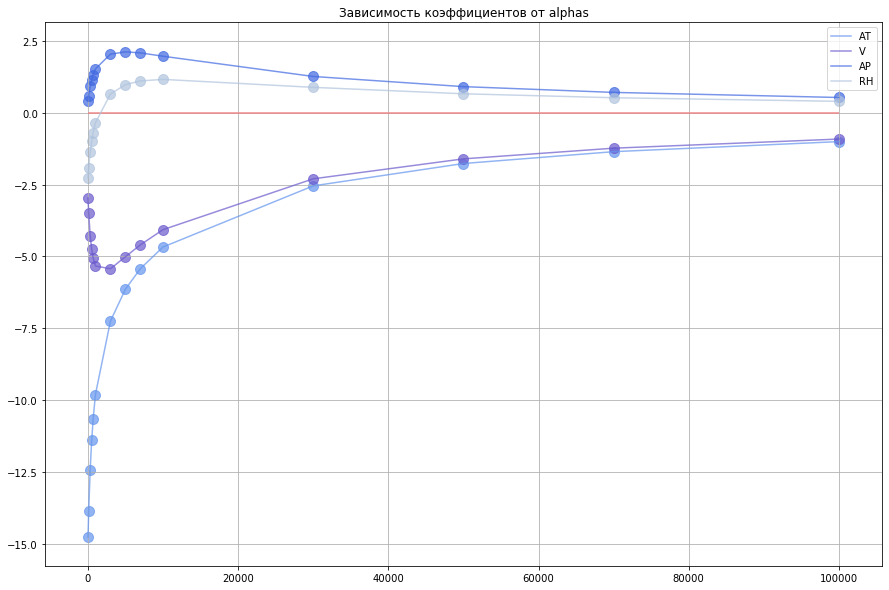

In [125]:
fig, axes = plt.subplots(figsize=(15, 10))
plot_alpha = 0.7
plot_marker = 'o'
scatter_size = 100
axes.plot(alphas, AT, c='cornflowerblue', label='AT', alpha = plot_alpha)
plt.scatter(alphas, AT, c='cornflowerblue', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
axes.plot(alphas, V, c='slateblue', label='V', alpha = plot_alpha)
plt.scatter(alphas, V, c='slateblue', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
axes.plot(alphas, AP, c='royalblue',  label='AP', alpha = plot_alpha)
plt.scatter(alphas, AP, c='royalblue', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
axes.plot(alphas, RH, c='lightsteelblue',  label='RH', alpha = plot_alpha)
plt.scatter(alphas, RH, c='lightsteelblue', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
plt.hlines(y=0, xmin=0, xmax=alphas[len(alphas)-1], lw=2, color='lightcoral', alpha = plot_alpha)
plt.grid()
plt.title('Зависимость коэффициентов от alphas')
plt.legend()
plt.show()

С увеличением alpha коэффициенты стремятся к нулю

#### Зависимость r2_score от alpha

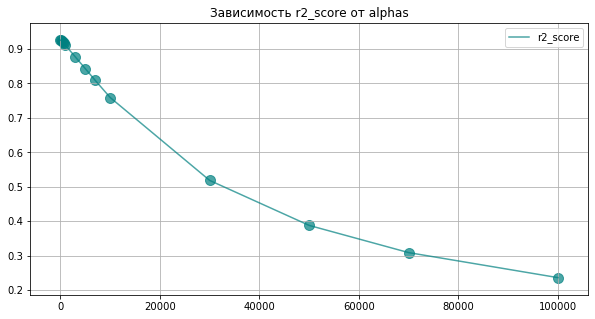

In [126]:
fig, axes = plt.subplots(figsize=(10, 5))

axes.plot(alphas, r2_sc, c='teal',  label='r2_score', alpha = plot_alpha)
plt.scatter(alphas, r2_sc, c='teal', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
plt.title('Зависимость r2_score от alphas')
plt.grid()
plt.legend()
plt.show()

С увеличением alpha r2-score уменьшается, поэтому видно, что alpha был выбран хорошо

### Lasso Regression

Построим Lasso Regression и посмотрим коэффициенты, с которыми данные входят в эту модель

In [159]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso.coef_

array([-1.40923427, -0.4098604 ,  0.        , -0.        ])

$Y = -1.40923427 \cdot X_{1} -0.4098604 \cdot X_{2}$ , <br> 
где  $X_{i}$ соответствуют тем же признакам, что и в Linear Regression

По коэффицициентам видно, как значение из каждого столбца влияет на то, насколько уменьшится или увеличится целевое значение<br>
Здесь, как видно, влияние имеют только AT и V
<br>
Нормализуем данные и построим Lasso Regression для них

In [160]:
pipe = make_pipeline(StandardScaler(), Lasso(alpha=10))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
lasso_regression_coefs = pipe.steps[1][1].coef_
lasso_regression_coefs

array([-6.243347, -0.      ,  0.      ,  0.      ])

По полученным коэффициентам посмотрим: <br>
1. Направление - уменьшится или увеличится целевое значение (зависит от знака перед коэффициентом):
 - AT(Temperature), V(Exhaust Vacuum) - целевое значение уменьшится с увеличением этих значений
 - AP(Ambient Pressure), RH(Relative Humidity) - целевое значение увеличится с увеличением этих значений
2. Значимость - насколько каждое значение влияет на целевое (зависит от модулей значений коэффициентов)
 - AT - наиболее сильное влияние на значение
 - V, AP, RH - незначительное

Посчитаем r2-score для Lasso Regression

In [161]:
lasso_regression_r2_score = r2_score(y_test, y_pred)
print('Lasso')
print(f'R2: {r2_score(y_test, y_pred)}')

Lasso
R2: 0.5577767103105034


Значение R2_score почти в половину меньше, чем у Linear и Ridge Regression. Из этого следует, что Lasso не лучшая модель для наших данных. Однако, если построить ее для нестандартизированных данных, то R2_score ~ 0.9, что является хорошим результатом. Но все же вроде как стандартизация нужна из-за разного масштаба признаков (AP ~ 1000, AT<40 ...) 

График разницы реальных и предсказанных значений для Lasso Regression

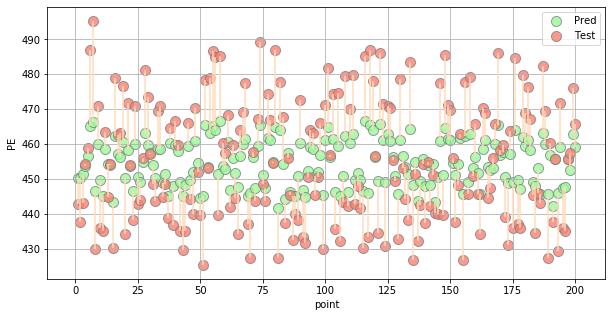

In [162]:
x = [i for i in range(len(y_pred))] 
size_ = 201
fig, axes = plt.subplots(figsize=(10, 5))
plt.scatter(x[1:size_], y_pred[1:size_], c='palegreen', edgecolors = 'gray', s = 100, label='Pred', alpha = 0.8)
plt.scatter(x[1:size_], list(y_test)[1:size_], c='salmon', edgecolors = 'gray', s = 100, label='Test', alpha = 0.8)
for i in range(1,size_):
    axes.vlines(x[i], min(y_pred[i], list(y_test)[i]), max(y_pred[i], list(y_test)[i]), color = 'peachpuff')
plt.xlabel('point')
plt.ylabel('PE')
plt.legend()
plt.grid()
plt.show()

Из-за того, что в Lasso Regression многие признаки занулились и остался только один, это привело к плохому результату. И как видно из графика, полученные результаты собрались в более кучную группу, чем действительные данные.

#### Cравним коэффициенты и r2-score у Linear, Ridge и Lasso regression

In [163]:
print(f'r2-score Linear regression: {linear_regression_r2_score}')
print(f'r2-score Ridge regression: {ridge_regression_r2_score}')
print(f'r2-score Lasso regression: {lasso_regression_r2_score}')

r2-score Linear regression: 0.9253965563534897
r2-score Ridge regression: 0.9252938226390941
r2-score Lasso regression: 0.5577767103105034
r2-score Lasso regression (without standard): 0.9069040550228255


Как видно, если у Linear и Ridge Regression r2-score примерно одинаковый, то у Lasso Regression он значительно ниже, значит, эта модель подходит нам меньше (для рассматриваемых данных), чем две предыдущие. <br>
Сравним кэффициенты обеих моделей

In [133]:
print(linear_regression_coefs)
print(ridge_regression_coefs)
print(lasso_regression_coefs)

[-14.8796515   -2.89972971   0.37537176  -2.30246358]
[-13.87622448  -3.48785866   0.59456292  -1.93188565]
[-6.243347 -0.        0.        0.      ]


Опять же, при практически одинаковых коэффициентах в Linear и Ridge Regression, коэффициенты Lasso Regression сильно от них отличаются - поэтому модель и хуже предсказывает данные

#### Зависимость коэффициентов от alpha

Построим график зависимости значений коэффициентов и r2-score в зависимости от изменения параметра alpha

In [153]:
alphas = [0.01, 0.1, 1, 3, 5, 7, 10, 13, 15, 17]
AT = []
V = []
AP = [] 
RH = []
r2_sc = []
for alph in alphas:
    pipe = make_pipeline(StandardScaler(), Lasso(alpha=alph))
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    AT.append(pipe.steps[1][1].coef_[0])
    V.append(pipe.steps[1][1].coef_[1])
    AP.append(pipe.steps[1][1].coef_[2])
    RH.append(pipe.steps[1][1].coef_[3])
    r2_sc.append(r2_score(y_test, y_pred))

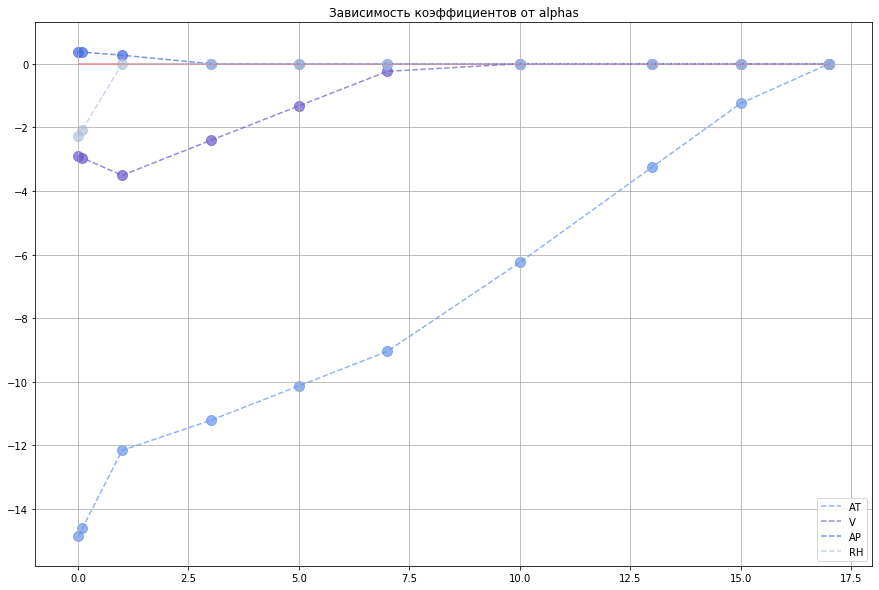

In [154]:
fig, axes = plt.subplots(figsize=(15, 10))
plot_alpha = 0.7
plot_marker = 'o'
scatter_size = 100
axes.plot(alphas, AT, c='cornflowerblue', label='AT', linestyle='--', alpha = plot_alpha)
plt.scatter(alphas, AT, c='cornflowerblue', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
axes.plot(alphas, V, c='slateblue', label='V', linestyle='--', alpha = plot_alpha)
plt.scatter(alphas, V, c='slateblue', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
axes.plot(alphas, AP, c='royalblue',  label='AP', linestyle='--', alpha = plot_alpha)
plt.scatter(alphas, AP, c='royalblue', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
axes.plot(alphas, RH, c='lightsteelblue',  label='RH', linestyle='--', alpha = plot_alpha)
plt.scatter(alphas, RH, c='lightsteelblue', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
plt.hlines(y=0, xmin=0, xmax=alphas[len(alphas)-1], lw=2, color='lightcoral', alpha = plot_alpha)
plt.grid()
plt.title('Зависимость коэффициентов от alphas')
plt.legend()
plt.show()

Видно, что первыми, практически одновременно, зануляются RH и AP. Потом зануляется V, и последним, немного позже остальных, AT. Из этого можно определить какие признаки являются более значимыми(те, которые зануляются последними), а какие наоборот, меньше влияют на нашу целевую переменную.

#### Зависимость r2_score от alpha

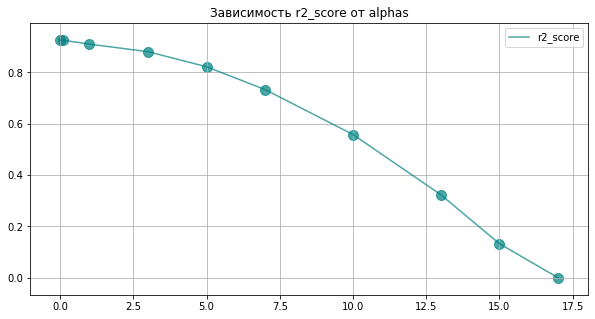

In [155]:
fig, axes = plt.subplots(figsize=(10, 5))

axes.plot(alphas, r2_sc, c='teal',  label='r2_score', alpha = plot_alpha)
plt.scatter(alphas, r2_sc, c='teal', s=scatter_size, marker=plot_marker, alpha = plot_alpha)
plt.title('Зависимость r2_score от alphas')
plt.grid()
plt.legend()
plt.show()

С увеличением alpha r2-score уменьшается<br>
По графику видно, чтобы улучшить результат стоило взять alpha ближе к 0

## ЧАСТЬ 2

In [4]:
data = pd.read_table('airfoil_self_noise.dat', names=['Frequency', 'Angle of attack', 'Chord length',
                                                     'Free-stream velocity', 'Suction side displacement thickness',
                                                     'Scaled sound pressure level'])
data

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [5]:
X, y = data.drop('Scaled sound pressure level', axis=1), data['Scaled sound pressure level']

Стандартизируем данные, потому что признаки сильно отличаются по масштабу, и нужно привести их к одному виду

In [6]:
scl = StandardScaler()
scl.fit(X)
X = scl.transform(X)
X_ = X

Подберем с помощью grid наилучшие параметры в Ridge Regression и Lasso Regerssion <br>
Также мы не знаем, окажется ли распределение данных более сложным, чем то, которое можно представить полиномом 1 порядка, поэтому также посторим Ridge Regression, Lasso Regerssion и Linear Regression на полиномах более высоких порядков <br>
Для каждой модели выведем наиболее значимые признаки (те, которые входят с коэффициентом больше 0.5) и то, в какой степени они представлены в этой модели

In [7]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 300, 500, 700, 1000, 3000, 5000, 7000, 10000, 
          30000, 50000, 70000, 100000, 300000, 500000, 700000,
         1000000, 3000000, 5000000, 7000000, 10000000, 30000000, 50000000, 70000000]
max_pow = 5
param_grid = { 'alpha': alphas }

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
for i in range(1, max_pow):
    poly = PolynomialFeatures(i) 
    param_grid = { 'alpha': alphas }
    X = poly.fit_transform(X_)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=True)

    grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=6, verbose=0)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print('Ridge polynom_pow: ', i)
    print(grid.best_estimator_)
    print()
    print(f'R2: {r2_score(y_test, y_pred)} \n')
    print()
    print()
    
    grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=6, verbose=0)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)          
    print('Lasso polynom_pow: ', i)  
    print(grid.best_estimator_)      
    print()
    print(f'R2: {r2_score(y_test, y_pred)} \n')
    print()
    print()
    
    param_grid = { }
    grid = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=6, verbose=0)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print('Linear polynom_pow: ', i)
    print(grid.best_estimator_)
    print()
    print(f'R2: {r2_score(y_test, y_pred)} \n')
    print()
    print()

Ridge polynom_pow:  1
Ridge(alpha=1)

R2: 0.4613753504219348 



Lasso polynom_pow:  1
Lasso(alpha=1e-06)

R2: 0.46118274027390693 



Linear polynom_pow:  1
LinearRegression()

R2: 0.46118268886252023 



Ridge polynom_pow:  2
Ridge(alpha=10)

R2: 0.6321635740574936 



Lasso polynom_pow:  2
Lasso(alpha=0.01)

R2: 0.6325062367744947 



Linear polynom_pow:  2
LinearRegression()

R2: 0.6324999334913858 



Ridge polynom_pow:  3
Ridge(alpha=1)

R2: 0.7245753518110796 



Lasso polynom_pow:  3
Lasso(alpha=0.01)

R2: 0.7224622656810701 



Linear polynom_pow:  3
LinearRegression()

R2: 0.7245015673711396 



Ridge polynom_pow:  4
Ridge(alpha=10)

R2: 0.7733746017186703 



Lasso polynom_pow:  4
Lasso(alpha=0.01)

R2: 0.7618366415801343 



Linear polynom_pow:  4
LinearRegression()

R2: 0.814527602846735 





Как видно из сравнений значений r2_score, наилучший результат (~0.814) получился в Linear Regression на полиноме 4 порядка

Попробуем применить алгоритм PCA чтобы сократить размерность данных и сгенерировать новые признаки, при этом сохранив наибольшее количество информации(95%). <br>
Аналогично с предыдущим, проверим различные модели

In [17]:
pca = PCA(.95)
X_pca = pca.fit_transform(X_)
for i in range(1, max_pow):
    poly = PolynomialFeatures(i) 
    param_grid = { 'alpha': alphas }
    X = poly.fit_transform(X_pca)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=True)

    grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=6, verbose=0)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print('Ridge polynom_pow: ', i)
    print(grid.best_estimator_)
    print()
    print(f'R2: {r2_score(y_test, y_pred)} \n')
    print()
    print()
    
    grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=6, verbose=0)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)          
    print('Lasso polynom_pow: ', i)  
    print(grid.best_estimator_)     
    print()
    print(f'R2: {r2_score(y_test, y_pred)} \n')
    print()
    print()
    
    param_grid = { }
    grid = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=6, verbose=0)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print('Linear polynom_pow: ', i)
    print(grid.best_estimator_)
    print()
    print(f'R2: {r2_score(y_test, y_pred)} \n')
    print()
    print()

Ridge polynom_pow:  1
Ridge(alpha=10)

R2: 0.5008561021697384 



Lasso polynom_pow:  1
Lasso(alpha=0.01)

R2: 0.5018731161857997 



Linear polynom_pow:  1
LinearRegression()

R2: 0.5014723917432347 



Ridge polynom_pow:  2
Ridge(alpha=10)

R2: 0.6216036093292316 



Lasso polynom_pow:  2
Lasso(alpha=0.01)

R2: 0.622410777244394 



Linear polynom_pow:  2
LinearRegression()

R2: 0.6218134590323343 



Ridge polynom_pow:  3
Ridge(alpha=10)

R2: 0.7086260026677988 



Lasso polynom_pow:  3
Lasso(alpha=0.01)

R2: 0.7083073824725747 



Linear polynom_pow:  3
LinearRegression()

R2: 0.7082817881918564 



Ridge polynom_pow:  4
Ridge(alpha=1)

R2: 0.7921044646197054 



Lasso polynom_pow:  4
Lasso(alpha=0.01)

R2: 0.784890328612508 



Linear polynom_pow:  4
LinearRegression()

R2: 0.7936936798825672 





Опять же, как видно из сравнений значений r2_score, наилучший результат (~0.793) получился в Linear Regression на полиноме 4 порядка (хотя все три регрессии на полиноме 4 порядка работают примерно с одинаковой точностью, и, значит, более важным фактором является степень полинома)